In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def autocorrFFT(x):
    N=len(x)
    F = np.fft.fft(x, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    res = np.fft.ifft(PSD)
    res= (res[:N]).real   #now we have the autocorrelation in convention B
    n=N*np.ones(N)-np.arange(0,N) #divide res(m) by (N-m)
    return res/n #this is the autocorrelation in convention A

#r is an (T,3) ndarray: [time stamps,dof]
def msd_fft(r):
    N=len(r)
    D=np.square(r).sum(axis=1)
    D=np.append(D,0)
    S2=sum([autocorrFFT(r[:, i]) for i in range(r.shape[1])])
    Q=2*D.sum()
    S1=np.zeros(N)
    for m in range(N):
        Q=Q-D[m-1]-D[N-m]
        S1[m]=Q/(N-m)
    return S1, S2


In [6]:
print (os.listdir('../../data/trajectory'))

['ani_free_gas.gif', 'ani_R020.gif', 'ani_R0300.gif', 'ani_sticky_gas_T0.1_F0.1_Ta10-R20.gif', 'ani_sticky_gas_T0.1_F1_Ta10.gif', 'cndb2ndb.py', 'ndb2pdb.py', 'snap800AB.npy', 'test.npy', 'test_ani.gif', 'test_traj_Rouse_chain_T1.0_F0.3_Ta180_Esoft0_R020_Na1200_blocksize100_kb10.0_dt0.001_kr30.0_positions.npy', 'test_traj_Rouse_chain_T1.0_F0.5_Ta60_Esoft0_R020_Na1200_blocksize100_kb5.0_dt0.001_kr30.0_positions.npy']


In [9]:
pos=np.load('../../data/trajectory/test_traj_Rouse_chain_T1.0_F0.3_Ta180_Esoft0_R020_Na1200_blocksize100_kb10.0_dt0.001_kr30.0_positions.npy')

In [10]:
bonds=pos[:,1:,:]-pos[:,:-1,:]

(1199,) (1199,)


(-1.0, 1.0)

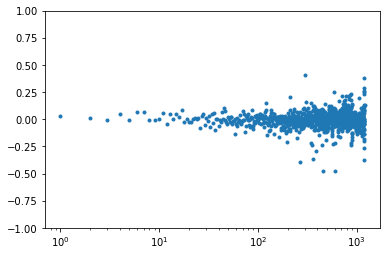

In [27]:
s1,s2=msd_fft(bonds[10,:,:])
s2=s2/np.linalg.norm(bonds[10,:,:], axis=1)
print(s1.shape,s2.shape)
plt.semilogx(s2,'.')
plt.ylim(-1,1)

In [22]:
norm_bonds=bonds[10,:,:]/np.linalg.norm(bonds[10,:,:], axis=1)
norm_bonds.shape

ValueError: operands could not be broadcast together with shapes (1199,3) (1199,) 